This notebook shows the training of various regression models with several versions of the dataset including **normalization** of the features as a preprocessing step.

## Import libraries

In [1]:
from utils.sql_utils import extract_data_from_sql_db

import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('bmh')

import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error

# Decision tree-based algoritms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Other machine learning algorithms
from sklearn.neighbors import KNeighborsRegressor

In [3]:
SEED = 21

## Load data

In [4]:
filter_params = {
    'year': 2021,
    'month': 1,
    'property_type': 'apartment',
    'operation': 'rent'
}

df = extract_data_from_sql_db(**filter_params)

# Create new variables
df['balcony_area'] = df['total_area_m2'] - df['covered_area_m2']
df['has_balcony_yn'] = np.where(df['balcony_area']==0, 0, 1)

## Clean data

In [5]:
comunas_list = [
    'Santiago',
    'Las Condes',
    'Providencia',
    'Ñuñoa',
    'Vitacura',
    'Estación Central',
    'San Miguel',
    'Independencia',
    'Lo Barnechea',
    'Macul',
    'La Florida',
    'Recoleta',
    'Quinta Normal',
    'La Cisterna',
    'San Joaquín',
    'La Reina',
    'Huechuraba'
]

In [6]:
neighborhoods_list = [
    # Huechuraba
    'Pedro Fontova',
    'Bosques De La Pirámide',
    'Ciudad Empresarial',
    'Huechuraba',
    # La Reina
    'Blest Gana',
    'La Reina',
    'Metro Príncipe De Gales - Country Club',
    'Metro Simón Bolivar',
    'Carlos Ossandón',
    # San Joaquín
    'Rodrigo De Araya',
    'San Joaquín',
    'Carlos Valdovinos',
    'Metro San Joaquín',
    # La Cisterna
    'Lo Ovalle',
    'Metro La Cisterna',
    'La Cisterna',
    'El Parrón',
    # Quinta Normal
    'Gruta De Lourdes',
    'Quinta Normal',
    'Parque Padre Renato Poblete',
    'Blanqueado',
    'Salvador Gutiérrez',
    # Recoleta
    'Cerro Blanco',
    'Bellavista',
    'Recoleta',
    'Patronato',
    'Cementerios',
    # La Florida
    'Plaza Vespucio',
    'La Florida',
    'Vicente Valdés',
    'Metro Mirador',
    'La Florida Alto',
    'Rojas Magallanes',
    # Macul
    'Macul',
    'Metro Camino Agrícola',
    'Metro Las Torres',
    'Villa Macul',
    'Las Dalias',
    'Santa Julia De Macul',
    'Escuela Agrícola',
    'Metro Carlos Valdovinos',
    'Metro Macul',
    'Metro Quilín',
    'Metro Los Presidentes',
    # Lo Barnechea
    'La Dehesa',
    'Lo Barnechea',
    'Puente Nuevo',
    'Los Trapenses',
    'El Huinganal',
    'Plaza San Enrique',
    'Valle Escondido',
    # Independencia
    'Hospitales',
    'Plaza Chacabuco',
    'Independencia',
    'Juan Antonio Ríos',
    'Metro Cal Y Canto',
    # San Miguel
    'Lo Vial',
    'Ciudad Del Niño',
    'El Llano',
#     'San Miguel',
    # Estación Central
    'San Alberto Hurtado',
    'Metro Ecuador',
    'Metro Las Rejas',
    'Universidad De Santiago',
    # Vitacura
    'Parque Bicentenario',
    'Pío Xi',
    'Tabancura',
#     'Vitacura',
    'Jardín Del Este',
    'La Llavería',
    'Juan Xxiii',
    'Santa María De Manquehue',
    'Estadio Manquehue',
    'Borde Río - Casa Piedra',
    'Lo Curro',
    'Estadio Croata',
    'Nuestra Señora Del Rosario',
    'Villa El Dorado',
    # Ñuñoa
    'Metro Irarrázaval',
    'Plaza Ñuñoa',
    'Metro Monseñor Eyzaguirre',
    'Metro Ñuñoa',
    'Estadio Nacional',
    'Plaza Egaña',
    'Parque Juan Xxiii',
    'Parque San Eugenio - Metro Ñuble',
    'Diagonal Oriente',
    'Metro Simón Bolivar',
    'Juan Gómez Millas',
    'Villa Frei',
    'Diego De Almagro',
    'Parque Botánico',
    'Amapolas',
    # Providencia
    'Los Leones',
    'Las Lilas',
    'Pedro De Valdivia',
    'Manuel Montt',
    'Metro Tobalaba - Mall Costanera',
    'Salvador',
    'Inés De Suárez',
    'Barrio Italia',
    'Campus Oriente',
    'Plaza Italia',
    'Metro Bilbao',
    'Pedro De Valdivia Norte',
    'Bellavista',
    # Las Condes
    'Barrio El Golf',
    'Metro Escuela Militar',
    'Metro Manquehue - Apumanque',
    'Parque Arauco',
    'Centro Financiero',
    'Nueva Las Condes',
    'Metro Hernando De Magallanes',
    'Sebastián Elcano',
    'Alto Las Condes',
    'Vaticano',
    'Rotonda Atenas',
    'Mall Sport',
    'San Carlos De Apoquindo',
    'Los Dominicos',
    'Estoril',
    'San Damián',
    'Parque Padre Alberto Hurtado',
    'Colón Oriente - Vital Apoquindo',
    # Santiago
    'Centro Histórico De Santiago',
    'Santa Isabel',
    'Bulnes',
    'San Diego',
    'Parque Almagro',
    'Bogotá - Sierra Bella',
    "Parque O'Higgins",
    'Ejército - Toesca',
    'Barrio Diez De Julio',
    'Barrio Yungay',
    'Barrio Brasil',
    'Barrio República',
    'Barrio Lastarria',
    'Franklin - Biobío',
    'Parque Los Reyes',
    'Barrio San Borja'
]

In [7]:
to_delete = df[
    (df['comuna'].isin(comunas_list)==False) |
    (df['neighborhood'].isin(neighborhoods_list)==False) |
    (df['balcony_area'] > 100) |
    (df['bathrooms'] > df['bedrooms'] + 1) |
    (df['bathrooms'] < df['bedrooms'] - 2) |
    ((df['bedrooms']==1) & (df['price'] > 2000000)) |
    ((df['bedrooms']==2) & (df['price'] > 3000000)) |
    ((df['comuna']=='Huechuraba') & (df['price'] >= 1000000)) |
    ((df['comuna']=='La Reina') & (df['price'] >= 1000000)) |
    ((df['comuna']=='San Joaquín') & (df['price'] >= 500000)) |
    ((df['comuna']=='La Cisterna') & (df['price'] >= 500000)) |
    ((df['comuna']=='Quinta Normal') & (df['price'] >= 500000)) |
    ((df['comuna']=='Recoleta') & (df['price'] >= 700000)) |
    ((df['comuna']=='La Florida') & (df['price'] >= 600000)) |
    ((df['comuna']=='Macul') & (df['price'] >= 600000)) |
    ((df['comuna']=='Independencia') & (df['price'] >= 500000)) |
    ((df['comuna']=='San Miguel') & (df['price'] >= 700000)) |
    ((df['comuna']=='Estación Central') & (df['price'] >= 500000)) |
    ((df['comuna']=='Ñuñoa') & (df['price'] >= 1000000)) |
    ((df['comuna']=='Providencia') & (df['price'] >= 1500000)) |
    ((df['comuna']=='Santiago') & (df['price'] >= 1000000))
].index.tolist()

df.drop(to_delete, axis=0, inplace=True)

In [8]:
# Delete rows of comuna-bedroom categories which have less than 5 properties
rows_to_delete = []
for cat in df['bedrooms'].unique():
    data = df[df['bedrooms']==cat]
    count_series = data['comuna'].value_counts()
    comunas_to_delete = count_series[count_series < 5].index.tolist()
    idx_list = data[data['comuna'].isin(comunas_to_delete)].index.tolist()
    rows_to_delete.extend(idx_list)
    
df.drop(rows_to_delete, axis=0, inplace=True)

In [9]:
df.head()

,price,bedrooms,bathrooms,covered_area_m2,total_area_m2,comuna,neighborhood,balcony_area,has_balcony_yn
0,523546,1,1,50,60,Las Condes,Barrio El Golf,10,1
1,550000,1,1,30,30,Las Condes,Barrio El Golf,0,0
2,400000,1,1,37,37,Las Condes,Barrio El Golf,0,0
3,465375,1,1,48,51,Las Condes,Barrio El Golf,3,1
4,450000,1,1,45,45,Las Condes,Barrio El Golf,0,0


## Check cleaned data

In [10]:
df[['price', 'covered_area_m2', 'total_area_m2']].describe().astype('int')

,price,covered_area_m2,total_area_m2
count,17796,17796,17796
mean,586464,68,74
std,470564,48,55
min,175000,16,16
25%,310000,38,40
50%,420000,50,54
75%,670000,80,87
max,4072028,500,600


In [11]:
df['comuna'] = df['comuna'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17796 entries, 0 to 18190
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   price            17796 non-null  int64   
 1   bedrooms         17796 non-null  int64   
 2   bathrooms        17796 non-null  int64   
 3   covered_area_m2  17796 non-null  int64   
 4   total_area_m2    17796 non-null  int64   
 5   comuna           17796 non-null  category
 6   neighborhood     17796 non-null  category
 7   balcony_area     17796 non-null  int64   
 8   has_balcony_yn   17796 non-null  int32   
dtypes: category(2), int32(1), int64(6)
memory usage: 1.1 MB


## Train machine learning models

In [13]:
ml_models = {
    # Decision tree-based algorithms
    'DecisionTree': DecisionTreeRegressor(random_state=SEED),
    'RandomForest': RandomForestRegressor(random_state=SEED, 
                                          n_jobs=-1),
    'GradientBoosting': GradientBoostingRegressor(random_state=SEED),
    'Bagging': BaggingRegressor(random_state=SEED, 
                                n_jobs=-1),
    'ExtraTrees': ExtraTreesRegressor(random_state=SEED, 
                                      n_jobs=-1),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=SEED),
    'XGBoost': XGBRegressor(use_label_encoder=False, 
                            eval_metric='mae', 
                            objective='reg:squarederror', 
                            random_state=SEED, 
                            n_jobs=-1),
    'LightGBM': LGBMRegressor(random_state=SEED, 
                              n_jobs=-1),
    'CatBoost': CatBoostRegressor(random_seed=SEED, 
                                  silent=True),
    
    # Linear models
    'LinearRegression': LinearRegression(n_jobs=-1, 
                                         fit_intercept=True, 
                                         normalize=False),
    'HuberRegressor': HuberRegressor(fit_intercept=True, 
                                     max_iter=100000),  # default=100
    'PassiveAggressiveRegressor': PassiveAggressiveRegressor(random_state=SEED, 
                                                             early_stopping=False, 
                                                             fit_intercept=True, 
                                                             max_iter=100000), # default=1000
    
    # k-nearest neighbors
    'KNeighborsRegressor': KNeighborsRegressor(n_jobs=-1),
}

In [14]:
results = pd.DataFrame.from_dict({'model': ml_models.keys()})

In [15]:
TRAIN_SIZE = 0.80

features_list = [
    ['bedrooms', 'bathrooms', 'covered_area_m2', 'comuna', 'neighborhood'], # dataset 01
    ['bedrooms', 'bathrooms', 'total_area_m2', 'comuna', 'neighborhood'], # dataset 02
    ['bedrooms', 'bathrooms', 'covered_area_m2', 'total_area_m2', 'comuna', 'neighborhood'], # dataset 03
    ['bedrooms', 'bathrooms', 'covered_area_m2', 'has_balcony_yn', 'comuna', 'neighborhood'], # dataset 04
    ['bedrooms', 'bathrooms', 'total_area_m2', 'has_balcony_yn', 'comuna', 'neighborhood'], # dataset 05
    ['bedrooms', 'bathrooms', 'covered_area_m2', 'balcony_area', 'comuna', 'neighborhood'], # dataset 06
    ['bedrooms', 'bathrooms', 'total_area_m2', 'balcony_area', 'comuna', 'neighborhood'] # dataset 07
]

for idx, features in enumerate(features_list):
    # Define features and target
    X = df[features]
    y = df['price']
    
    # Get dummy variables
    X = pd.get_dummies(X)
    
    # Train / Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        train_size=TRAIN_SIZE, 
                                                        random_state=SEED)
    
    # Feature scaling using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)
    
    # Train models
    scores = []
    for key in ml_models:
        estimator = ml_models[key]
        estimator.fit(X_train_sc, y_train)
        y_pred = estimator.predict(X_test_sc)
        score = int(median_absolute_error(y_test, y_pred))
        scores.append(score)
    
    results['dataset_0{}'.format(idx + 1)] = scores

## Analyze results

In [16]:
results.set_index('model', inplace=True)
results

,dataset_01,dataset_02,dataset_03,dataset_04,dataset_05,dataset_06,dataset_07
model,,,,,,,
DecisionTree,43806,42147,43855,45000,43333,45801,41851
RandomForest,40531,39662,39425,39790,39500,39084,39533
GradientBoosting,46351,45417,45073,45733,45316,45684,44927
Bagging,41877,40414,40078,40663,40000,39619,40000
ExtraTrees,40776,40000,40000,40674,40000,40000,40000
HistGradientBoosting,43467,40912,41159,41042,41644,42008,40203
XGBoost,46765,44850,45168,45646,44687,44831,44847
LightGBM,41915,40036,40712,41077,40364,40358,39724
CatBoost,41545,39029,40225,40289,39203,39245,38837


In [17]:
results.mean().mean()

43132.18681318681

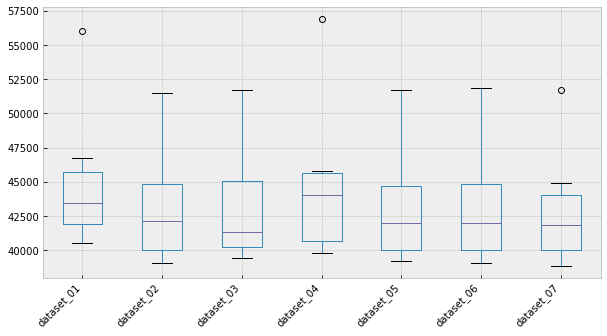

dataset_07    42415.384615
dataset_02    42630.076923
dataset_05    42774.076923
dataset_06    42883.769231
dataset_03    42921.384615
dataset_04    43956.461538
dataset_01    44344.153846
dtype: float64


In [18]:
plt.figure(figsize=(10,5))
results.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

print(results.mean().sort_values())

In [19]:
transposed_results = results.T

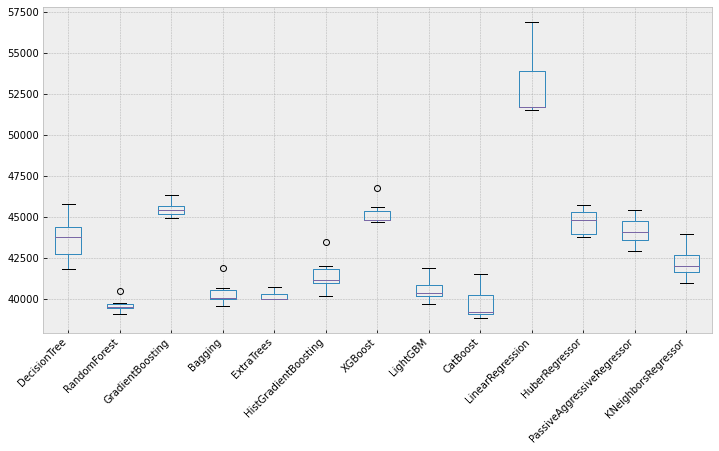

model
RandomForest                  39646.428571
CatBoost                      39767.571429
ExtraTrees                    40207.142857
Bagging                       40378.714286
LightGBM                      40598.000000
HistGradientBoosting          41490.714286
KNeighborsRegressor           42248.000000
DecisionTree                  43684.714286
PassiveAggressiveRegressor    44180.428571
HuberRegressor                44713.142857
XGBoost                       45256.285714
GradientBoosting              45500.142857
LinearRegression              53047.142857
dtype: float64


In [20]:
plt.figure(figsize=(12,6))
transposed_results.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

print(transposed_results.mean().sort_values())